# Introduction to Julia

Let's start with a quick overview of the basic syntax, emphasising differences with Python.

# Variables and arithmetic

Numeric values in Julia work similarly to Python:

Variables in Julia are created as in Python, with a simple assignment operation; variable names can be *arbitrary unicode characters*. Many may be entered in LaTeX notation, using tab substitution: type `\alpha<TAB>`. There is also tab completion on partial names: `\alp<TAB>`

In [2]:
x = 3

3

In [3]:
y = 5

5

In [5]:
α = 3; ℵ = 10

10

Functions use parentheses (round brackets, `()`) around the arguments being passed. `println` prints its arguments, followed by a new line. [`print` omits the new line.] 

In [6]:
println("α = ", α)

α = 3


Simple functions may be defined with a nice mathematical syntax; `*` is not needed in simple expressions:

In [12]:
f(x) = 2x^2 + 3x + 1
g(x) = f(x) - (2x+1)*(x+1)

g (generic function with 1 method)

In [9]:
f(3)

28

In [11]:
g(3.5)

LoadError: type: g: in apply, expected Function, got Float64
while loading In[11], in expression starting on line 1

## Variable substitution

The values of variables may be substituted into strings in a simple way using the `$` operator:

In [17]:
# Variable substitution with $:
name = "David"
greeting = "Hello, $name"
println(greeting)

Hello, David


More complicated expressions are wrapped in parentheses:

In [13]:
μ = 3
println("The sine of $μ is $(sin(μ))")

The sine of 3 is 0.1411200080598672


## Numerical types

There are numerical types with different precisions: typing `Float<TAB>` or `Int<TAB>` will provide a list. Currently, in arithmetic calculations types are promoted to the machine type. (This looks likely to change soon.)

Machine integers!

In [15]:
a = int(1e16)
a * 10

100000000000000000

In [5]:
a = int8(1)
b = int8(2)
a + b

3

In [6]:
typeof(ans)

Int64

These promotion rules are defined in `int.jl`.

## Arbitrary-precision arithmetic

Arbitrary-precision integers and floating points are available through the types `BigInt` and `BigFloat`. The function `big` converts a number into the corresponding `Big` type:

In [16]:
big(10)

10

In [17]:
typeof(ans)

BigInt (constructor with 10 methods)

Note that, unlike in Python, integers *are not* automatically promoted to arbitrary-precision integers.

----
**Exercise**: Calculate powers of 10 using standard integers and `BigInt`s

----

In [18]:
10^5

100000

In [1]:
10**5

LoadError: syntax: use "^" instead of "**"
while loading In[1], in expression starting on line 1

In [24]:
10^19

-8446744073709551616

In [25]:
ten = big(10)

10

In [27]:
ten^19

10000000000000000000

In [4]:
i = int8(10)

10

In [5]:
i * int8(1)

10

In [6]:
typeof(ans)

Int64

In [7]:
typemax(Int64)

9223372036854775807

In [36]:
typemin(Int64)

-9223372036854775808

## Complex numbers

Complex numbers are written using `im` for the imaginary part:

In [8]:
a = 7
c = (1+3.5im) * a

7.0 + 24.5im

In [9]:
c.im

24.5

In [10]:
c.re, c.im

(7.0,24.5)

In [11]:
c * conj(c)  # conj is a function that returns the conjugate of a complex number

649.25 + 0.0im

(Tuples behave similarly to Python.)

## Rational numbers

Rational numbers are also built into Julia; they are created using the `//` operator:

In [42]:
3//4

3//4

In [43]:
typeof(ans)

Rational{Int64} (constructor with 1 method)

In [49]:
(big(3)//4)^50

717897987691852588770249//1267650600228229401496703205376

In [50]:
typeof(ans)

Rational{BigInt} (constructor with 1 method)

In [58]:
3//4 + 5//6

19//12

Operators are a convenient way of writing functions:

In [51]:
+(3, 4)

7

In [8]:
//(3, 4)

3//4

In [52]:
//

// (generic function with 8 methods)

We see that `//` is a *function*, implemented as a series of *methods*. We can see what these methods are:

In [12]:
methods(//)

# 8 methods for generic function "//":
//(n::Integer,d::Integer) at rational.jl:15
//(x::Rational{T<:Integer},y::Integer) at rational.jl:16
//(x::Integer,y::Rational{T<:Integer}) at rational.jl:17
//(x::Rational{T<:Integer},y::Rational{T<:Integer}) at rational.jl:18
//(x::Complex{T<:Real},y::Real) at rational.jl:19
//(x::Real,y::Complex{T<:Real}) at rational.jl:20
//(x::Complex{T<:Real},y::Complex{T<:Real}) at rational.jl:23
//(X::AbstractArray{T,N},y::Number) at rational.jl:28

In [13]:
3 + -34

-31

The expression `n::Integer` is a *type annotation* that specifies that the method applies when its first argument is of type `Integer`.

Clicking on the file name takes us directly to the Julia standard library source code on GitHub where these functions are defined!

# Vectors: an "equivalent" of Python lists *and* `numpy` arrays

To store several values "in one variable", we can try to imitate using a "list" as we would in Python:

In [14]:
l = [3, 4, 5]

3-element Array{Int64,1}:
 3
 4
 5

In [15]:
typeof(l)

Array{Int64,1}

In Julia these objects are called `Array`s. The curly braces indicate type parameters of the `Array` type. The first is the type of element contained in the `Array` (all must be of the same type) and the second the number of dimensions.

----
**Exercise**: Try to create an array in this way with elements of different types. What happens?


**Exercise**: What does the following syntax do?:  `l = {3, 4, 7.5}`

----

In [16]:
l = [3., 4, 5]

3-element Array{Float64,1}:
 3.0
 4.0
 5.0

In [17]:
l = [3., "a"]

2-element Array{Any,1}:
 3.0 
  "a"

In [18]:
l = [3., 'a']

2-element Array{Float64,1}:
  3.0
 97.0

In [66]:
l = {3., 4, "hello", [3, 4]}

4-element Array{Any,1}:
 3.0     
 4       
  "hello"
  [3,4]  

## Indexing

The indices of Julia arrays are numbered starting at 1, unlike Python (where they are numbered starting at 0).

In [67]:
l[1]  

3.0

The syntax for ranges is similar to that for Python:

In [68]:
l[1:2]

2-element Array{Any,1}:
 3.0
 4  

However, the limits must be explicitly specified:

In [69]:
l[2:end]   # Use `end` explicitly

3-element Array{Any,1}:
 4       
  "hello"
  [3,4]  

In [21]:
l[1:end-1]

1-element Array{Float64,1}:
 3.0

In [20]:
l[-1]

LoadError: BoundsError()
while loading In[20], in expression starting on line 1

Julia `Arrays`, like Python lists, but unlike `numpy` arrays, are dynamic. However, the syntax is rather different from Python -- to add an element at the end of the list, we write

In [22]:
l = [3,4,5]
l + l

3-element Array{Int64,1}:
  6
  8
 10

In [23]:
names(l)

0-element Array{Any,1}

In [25]:
l = [3, 4, 5]

push!(l, 7)

4-element Array{Int64,1}:
 3
 4
 5
 7

In [29]:
sizehint

sizehint (generic function with 13 methods)

In [27]:
push!

push! (generic function with 41 methods)

In [77]:
methods(push!)

# 19 methods for generic function "push!":
push!(a::Array{Any,1},item) at array.jl:464
push!{T}(a::Array{T,1},item) at array.jl:453
push!(B::BitArray{1},item) at bitarray.jl:454
push!(s::IntSet,n::Integer) at intset.jl:32
push!(::EnvHash,k::String,v) at env.jl:114
push!(t::Associative{K,V},key,v) at dict.jl:241
push!(s::Set{T},x) at set.jl:18
push!{T}(q::Deque{T},x) at /Users/david/.julia/DataStructures/src/deque.jl:189
push!(s::Stack{S},x) at /Users/david/.julia/DataStructures/src/stack.jl:16
push!{T,V<:Number}(ct::Accumulator{T,V<:Number},x::T) at /Users/david/.julia/DataStructures/src/accumulator.jl:48
push!(s::IntDisjointSets,x::Integer) at /Users/david/.julia/DataStructures/src/disjoint_set.jl:72
push!(s::IntDisjointSets) at /Users/david/.julia/DataStructures/src/disjoint_set.jl:81
push!{T}(s::DisjointSets{T},x::T) at /Users/david/.julia/DataStructures/src/disjoint_set.jl:124
push!{T}(h::BinaryHeap{T,Comp},v::T) at /Users/david/.julia/DataStructures/src/heaps/binary_heap.jl:138
push!{T}(h::MutableBinaryHeap{T,Comp},v::T) at /Users/david/.julia/DataStructures/src/heaps/mutable_binary_heap.jl:201
push!(s::OrderedSet{T},x) at /Users/david/.julia/DataStructures/src/orderedset.jl:26
push!(A) at abstractarray.jl:1391
push!(A,a,b) at abstractarray.jl:1392
push!(A,a,b,c...) at abstractarray.jl:1393

In [78]:
methodswith(Array)

107-element Array{Method,1}:
 sizeof(a::Array{T,N}) at array.jl:23                                                                                                                   
 get(A::Array{T,N},B::Array{T,N},I,default) at deprecated.jl:26                                                                                         
 .*(A::SparseMatrixCSC{Tv,Ti<:Integer},B::Array{T,N}) at sparse/sparsematrix.jl:619                                                                     
 .*(A::Array{T,N},B::SparseMatrixCSC{Tv,Ti<:Integer}) at sparse/sparsematrix.jl:620                                                                     
 unsafe_copy!{T}(dest::Array{T,N},dsto,src::Array{T,N},so,N) at array.jl:40                                                                             
 reshape{T,N}(a::Array{T,N},dims::NTuple{N,Int64}) at array.jl:88                                                                                       
 reshape{T,N}(a::Array{T,N},dims::NTuple{N,Int64}) at array.jl:99                                                                                       
 rand!{T}(A::Array{T,N}) at random.jl:128                                                                                                               
 ./(A::SparseMatrixCSC{Tv,Ti<:Integer},B::Array{T,N}) at sparse/sparsematrix.jl:624                                                                     
 ./(A::Array{T,N},B::SparseMatrixCSC{Tv,Ti<:Integer}) at sparse/sparsematrix.jl:625                                                                     
 msync{T}(A::Array{T,N}) at mmap.jl:6                                                                                                                   
 msync(A::Array{T,N},flags::Int64) at deprecated.jl:26                                                                                                  
 sub{T,N}(A::Array{T,N},i::(Range{Int64},)) at subarray.jl:51                                                                                           
 ⋮                                                                                                                                                      
 permutedims!{T,N}(P::Array{T,N},B::Union(DenseArray{T,N},SubArray{T,N,A<:DenseArray{T,N},I<:(Union(Range{Int64},Int64)...,)}),perm) at cartesian.jl:100
 similar(a::Array{T,N},T,dims::(Int64...,)) at array.jl:107                                                                                             
 slicedim(A::Array{T,N},d::Integer,i::Integer) at array.jl:843                                                                                          
 flipdim{T}(A::Array{T,N},d::Integer) at array.jl:874                                                                                                   
 repeat{T}(A::Array{T,N}) at abstractarray.jl:1089                                                                                                      
 \(A::Array{T,N},x::Number) at deprecated.jl:26                                                                                                         
 -(A::Array{T,N},B::SparseMatrixCSC{Tv,Ti<:Integer}) at sparse/sparsematrix.jl:615                                                                      
 -(A::SparseMatrixCSC{Tv,Ti<:Integer},B::Array{T,N}) at sparse/sparsematrix.jl:613                                                                      
 xdump(fn::Function,io::IO,x::Array{T,N},n::Int64,indent) at show.jl:626                                                                                
 .^(A::SparseMatrixCSC{Tv,Ti<:Integer},B::Array{T,N}) at sparse/sparsematrix.jl:638                                                                     
 .^(A::Array{T,N},B::SparseMatrixCSC{Tv,Ti<:Integer}) at sparse/sparsematrix.jl:639                                                                     
 Message(a::Array{T,N}) at /Users/david/.julia/ZMQ/src/ZMQ.jl:405

In [28]:
l = [3, 4, 5]
push!(l, 12.0)

4-element Array{Int64,1}:
  3
  4
  5
 12

In [80]:
12.0 == 12

true

In [81]:
push!(l, 12.1)

LoadError: InexactError()
while loading In[81], in expression starting on line 1

In [ ]:
append!(l, [10, 11, 12])

`push!` replaces `append` in Python. There are no methods of objects as in Python; rather, we use functions and send the object as an argument of the function.

The exclamation mark, or *bang*, (`!`) indicates that the function modifies its argument; this is a standard convention in Julia.

Arrays which have been defined with a certain type *cannot* acquire elements of a different type:

In [10]:
l = [3, 4, 5]
push!(l, "hello")

LoadError: no method convert(Type{Int64}, ASCIIString)
while loading In[10], in expression starting on line 2

`Array`s work as mathematical vectors, with the sum of two vectors and scalar multiplication being defined:

In [30]:
a = [1.1, 2.2, 3.3]
b = [4.4, 5.5, 6.6]

3-element Array{Float64,1}:
 4.4
 5.5
 6.6

In [31]:
a + b

3-element Array{Float64,1}:
 5.5
 7.7
 9.9

In [32]:
3.5 * a

3-element Array{Float64,1}:
  3.85
  7.7 
 11.55

However, operators are, in general, *not* treated in an elementwise fashion (as they would be e.g. in `numpy`):

In [33]:
a * b

LoadError: `*` has no method matching *(::Array{Float64,1}, ::Array{Float64,1})
while loading In[33], in expression starting on line 1

Rather, elementwise operations use a Matlab-like syntax, with an extra `.` before the symbol for the operator:

In [34]:
a .* b

3-element Array{Float64,1}:
  4.84
 12.1 
 21.78

There are many useful operations on vectors predefined, without needing to explicitly import them.

In [35]:
dot(a,b)  # ans is the last result

38.72

In [36]:
cross(a, b)

3-element Array{Float64,1}:
 -3.63
  7.26
 -3.63

In [37]:
norm(a)

4.115823125451335

Use `help` or `?` (before the command) to obtain help:

In [38]:
help(dot)

INFO: Loading help data...


Base.dot(x, y)
⋅(x, y)

   Compute the dot product. For complex vectors, the first vector is
   conjugated.


In [39]:
?dot

Base.dot(x, y)
⋅(x, y)

   Compute the dot product. For complex vectors, the first vector is
   conjugated.


In [40]:
transpose(a)

1x3 Array{Float64,2}:
 1.1  2.2  3.3

In [93]:
a'

1x3 Array{Float64,2}:
 1.1  2.2  3.3

In [94]:
M = [[2,1], [1,1]]

4-element Array{Int64,1}:
 2
 1
 1
 1

In [96]:
push!(l, 12.0)

2x2 Array{Int64,2}:
 2  1
 1  1

In [97]:
M = [2 1; 1 1]

2x2 Array{Int64,2}:
 2  1
 1  1

In [99]:
M = reshape([1:8], (2,2,2))

2x2x2 Array{Int64,3}:
[:, :, 1] =
 1  3
 2  4

[:, :, 2] =
 5  7
 6  8

In [102]:
a ⋅ b
a × b

3-element Array{Float64,1}:
 -3.63
  7.26
 -3.63

I used `\cdot`

In [103]:
⋅

dot (generic function with 7 methods)

[Note that in the Julia command-line REPL, typing `?` puts it immediately into a special help mode. Similarly, `;` puts it into shell mode, in which commands are sent straight to the shell.]

# Control flow: drop the colon (`:`) and add `end`

White space in Julia is *not* significant. Commands on one line can be separated by `;`. Blocks *must* finish with `end`

In [42]:
i = 0
while i < 5 
    print("$i\t")
    i += 1
    end

0	1	2	3	4	

In [43]:
total = 0
for i = 1:10
    total += i
end
println("Sum is $total")

Sum is 55


Here, `1:10` is a *range object* which may be iterated over.

In [108]:
typeof(1:10)

UnitRange{Int64} (constructor with 1 method)

We can construct an array from this by enclosing it in square brackets:

In [110]:
collect(1:10)

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [45]:
[1:2:10,17]

6-element Array{Int64,1}:
  1
  3
  5
  7
  9
 17

Use `help` or `?` to get help:

In [113]:
?dot

Base.dot(x, y)

   Compute the dot product. For complex vectors, the first vector is
   conjugated.


In [114]:
help(dot)

Base.dot(x, y)

   Compute the dot product. For complex vectors, the first vector is
   conjugated.


In [115]:
help("dot")

Base.dot(x, y)

   Compute the dot product. For complex vectors, the first vector is
   conjugated.

Base.LinAlg.BLAS.dot(n, X, incx, Y, incy)

   Dot product of two vectors consisting of "n" elements of array
   "X" with stride "incx" and "n" elements of array "Y" with
   stride "incy".


**Exercise**: Implement the Babylonian method for calculating the square root of a positive number $y$, via the iteration 
$$x_{n+1} = \textstyle \frac{1}{2} (x_n + \frac{y}{x_n})$$

In [121]:
♆ = norm

norm (generic function with 15 methods)

In [123]:
♆(a)

4.115823125451335

In [124]:
snowman(x) = x^2

snowman (generic function with 1 method)

In [126]:
☃ = snowman
☃(3)

9

## Short-circuit evaluation

In [128]:
a = 3
a < 5 && println("Small")   # evaluate the second statement only if the first is true;  semantics of if-then

a > 10 || println("Small")  # semantics of if not-then

Small
Small


In [129]:
a == 3 ? println("Hello") : println("Not true")

Hello


## Array comprehensions

There is an equivalent of list comprehensions in Python, as follows. Note that the array construction syntax is quite flexible.

In [54]:
squares = [i^2 for i in [1:2:10, 7]]

6-element Array{Any,1}:
  1
  9
 25
 49
 81
 49

In [55]:
sums = [i+j for i=1:5, j=1:5]

5x5 Array{Int64,2}:
 2  3  4  5   6
 3  4  5  6   7
 4  5  6  7   8
 5  6  7  8   9
 6  7  8  9  10

In [56]:
sums = [i+j+k for i=1:5, j=1:5, k=1:5]

5x5x5 Array{Int64,3}:
[:, :, 1] =
 3  4  5   6   7
 4  5  6   7   8
 5  6  7   8   9
 6  7  8   9  10
 7  8  9  10  11

[:, :, 2] =
 4  5   6   7   8
 5  6   7   8   9
 6  7   8   9  10
 7  8   9  10  11
 8  9  10  11  12

[:, :, 3] =
 5   6   7   8   9
 6   7   8   9  10
 7   8   9  10  11
 8   9  10  11  12
 9  10  11  12  13

[:, :, 4] =
  6   7   8   9  10
  7   8   9  10  11
  8   9  10  11  12
  9  10  11  12  13
 10  11  12  13  14

[:, :, 5] =
  7   8   9  10  11
  8   9  10  11  12
  9  10  11  12  13
 10  11  12  13  14
 11  12  13  14  15

# Matrices

Square brackets with commas gives a one-dimensional vector. This is printed in a way that treats it as if it were a column vector (although there is in fact no difference between a *one-dimensional* row vector and column vector).

In [ ]:
v = [3, 4, 5]

To create explicit matrices, Matlab-style notation is used. If we omit the commas, something different happens: we now obtain a *two-dimensional* `Array`, i.e. a matrix, of size $1 \times n$. [Recall that in the standard notation for matrices, an $m \times n$ matrix has $m$ *rows* and $n$ *columns*.]

In [ ]:
row_vec = [3 4 5]

We can also use the transpose operator, `'`. [This is actually the *conjugate*-transpose operator, which also takes the complex conjugate of complex numbers. Transpose without conjugate is denoted `.'`]

In [ ]:
row_vec = [1im, 2]'

In [ ]:
row_vec = [1im, 2].'

A complete matrix may be constructed using a semicolon (`;`) to separate rows:

In [135]:
M = [1 2; 3 4]

2x2 Array{Int64,2}:
 1  2
 3  4

As in `numpy`, it may also be created using a `reshape`:

In [ ]:
M = reshape([1, 2, 3, 4], (2,2))

Here, as in Python, `(2,2)` denotes an (immutable) tuple:

In [ ]:
t = (2, 2)
typeof(t)

There is an important difference in the way that Python and Julia treat slices of matrices. While in Python a one-dimensional slice in either direction returns a 1-dimensional vector, in Julia there is a difference. A vertical one-dimensional slice gives a 1-dimensional vector (a "column vector"):

In [3]:
M[:,1]

2-element Array{Int64,1}:
 1
 3

However, a horizontal one-dimensional slice produces a $1 \times n$ matrix:

In [5]:
M[1,:]

1x2 Array{Int64,2}:
 1  2

This is the same result that is produced using the following Matlab-like syntax:

In [6]:
[1 2]

1x2 Array{Int64,2}:
 1  2

## Random numbers

The Mersenne Twister (pseudo-)random number generator is built-in to Julia:

In [136]:
rand()

0.30176459533546285

In [137]:
rand(5)

5-element Array{Float64,1}:
 0.322047
 0.858765
 0.744449
 0.932944
 0.735366

In [138]:
x = rand(5, 5)

5x5 Array{Float64,2}:
 0.718125    0.514504  0.485157  0.118623   0.954479
 0.665983    0.223968  0.571665  0.337021   0.418121
 0.388917    0.989328  0.588583  0.0660616  0.636201
 0.00130766  0.277592  0.476613  0.21       0.171883
 0.0978661   0.499811  0.816341  0.772805   0.207609

In [ ]:
rand

## Matrix multiplication

In [60]:
v = [1, 2]

2-element Array{Int64,1}:
 1
 2

In [140]:
v*v

LoadError: no method *(Array{Int64,1}, Array{Int64,1})
while loading In[140], in expression starting on line 1

In [17]:
dot(v, v)

5

In [58]:
M = [2 1; 1 1]

2x2 Array{Int64,2}:
 2  1
 1  1

In [142]:
dot(M, v)

LoadError: no method dot(Array{Int64,2}, Array{Int64,1})
while loading In[142], in expression starting on line 1

Matrix multiplication uses the `*` operator:

In [61]:
M * v

2-element Array{Int64,1}:
 4
 3

In [62]:
@which M*v

*{T,S}(A::AbstractArray{T,2},x::AbstractArray{S,1}) at linalg/matmul.jl:71

**Exercise**: Use the *power method* to calculate the largest eigenvalue $\lambda_1$ of the matrix $M = \begin{pmatrix} 2 & 1 \\ 1 & 1 \end{pmatrix}$. In this method, we start from an arbitrary non-zero vector $\mathbf{w}$, and repeatedly apply $M$ to it, thus calculating powers of the matrix $M$ applied to $\mathbf{w}$. The resulting vector converges to the eigenvector $\mathbf{v}_1$ corresponding to $\lambda_1$.

In [63]:
w = [1., 1]
M = reshape([2., 1, 1, 1], (2,2))

M, w

(
2x2 Array{Float64,2}:
 2.0  1.0
 1.0  1.0,

[1.0,1.0])

In [70]:
w0 = [1., 1]
w = copy(w0)

for i in 1:10
    w_new = M*w
    println(w_new)
    w = w_new / norm(w_new)
end

[3.0,2.0]
[2.218800784900916,1.3867504905630725]
[2.225995548013356,1.377997244008268]
[2.226884907992019,1.3766197613041573]
[2.227011236629627,1.3764166670835891]
[2.2270295947419534,1.3763869909147883]
[2.227032271600713,1.3763826602598124]
[2.227032662116069,1.3763820284053259]
[2.2270327190907873,1.3763819362185634]
[2.227032727403272,1.376381922768687]


In [1]:
for i =1:10
    t = 3
end
t #won't be printed because t just exists in the for scope

LoadError: t not defined
while loading In[1], in expression starting on line 4

# Linear algebra

Julia has built-in linear algebra, not only using LAPACK, but now also generic routines that work for arbitrary element types, implemented completely in Julia.

For example, given a matrix $A$, the LU-decomposition of $A$ is equivalent to Gaussian elimination; it expresses $A$ as the product $A = LU$, with $L$ a lower-triangular and $U$ an upper-triangular matrix.

This is *implemented in pure Julia* for arbitrary element types. When the elements are standard floating-point numbers, it uses the corresponding fast LAPACK implementation.

In [2]:
M = rand(100, 100)
eig(M)

(Complex{Float64}[49.4553+0.0im,2.60611+1.39241im,2.60611-1.39241im,2.80843+0.0im,1.6786+2.20359im,1.6786-2.20359im,-2.5772+0.722606im,-2.5772-0.722606im,-2.07661+1.73455im,-2.07661-1.73455im  …  0.318764-0.818766im,-0.664996+0.0im,-0.262399+0.696736im,-0.262399-0.696736im,0.631772+0.341774im,0.631772-0.341774im,-0.337579+0.0im,0.0258253+0.441807im,0.0258253-0.441807im,0.244242+0.0im],
100x100 Array{Complex{Float64},2}:
  -0.104506+0.0im   -0.0583494+0.0673774im   …    -0.126245+0.0im
  -0.110228+0.0im   -0.0302002+0.0203231im       0.00971673+0.0im
  -0.106192+0.0im    0.0835864-0.0366953im       -0.0100192+0.0im
  -0.101028+0.0im   -0.0976258-0.0103224im       -0.0208308+0.0im
  -0.109692+0.0im    0.0206091+0.051544im        -0.0373466+0.0im
 -0.0927222+0.0im   0.00469629+0.0464441im   …   -0.0464968+0.0im
  -0.106839+0.0im    0.0021757+0.110256im         -0.116836+0.0im
   -0.10324+0.0im   -0.0737389-0.14787im         -0.0407359+0.0im
  -0.102974+0.0im     -0.11934-0.0301666im      

In [3]:
M = rand(100, 100)
M2 = map(big, M)

100x100 Array{BigFloat,2}:
 3.41499732256071553138099261559545993804931640625e-01      …  6.689973747130995018750354574876837432384490966796875e-01
 3.837450544904055238504270164412446320056915283203125e-01     7.06782295861154263860726132406853139400482177734375e-01 
 6.73779399891735852889951274846680462360382080078125e-01      8.158750410289050680745503996149636805057525634765625e-01
 6.047191231529878141515155220986343920230865478515625e-01     2.68999012840712481420268886722624301910400390625e-01    
 3.51359116190601117324376900796778500080108642578125e-01      4.960645408074408901910601343843154609203338623046875e-01
 9.30187353346197287606855752528645098209381103515625e-01   …  1.9592681156523372720812403713352978229522705078125e-01  
 4.1193169713166977174978455877862870693206787109375e-01       2.0328662478073766806119238026440143585205078125e-01     
 4.76493709114803376536428913823328912258148193359375e-01      8.88367071632467197872529141022823750972747802734375e-01 
 8.63

In [4]:
lu(M2)

(
100x100 Array{BigFloat,2}:
 1e+00                                                                                 …  0e+00
 2.083543061729824728373762137800462284256013864405782072863835894555022090664619e-01     0e+00
 1.885080284248462046020553070941008006804923664109838738230355865657787411698943e-01     0e+00
 4.868390494295089913791749872572274980146677026896154096577236088185654381668904e-02     0e+00
 9.308379963386380414924032310016838399893783533616283757409827477656339899757264e-01     0e+00
 7.588133956951531752045254445901184138969646497514731338899505551158575891805754e-01  …  0e+00
 5.266178057727190424640646456875355137119195255458693197726150378925488423692808e-02     0e+00
 4.122198331411938617095188149651482955907553341364862761717983837869016180082745e-01     0e+00
 4.768270046510868759568943997449232728715348268189695326045702886622947615102341e-01     0e+00
 7.262472956699855818394390561425701183431889871884939446174009974067744265886207e-01     0e+00
 4.89715913

In [5]:
lu(M)

(
100x100 Array{Float64,2}:
 1.0         0.0           0.0        …   0.0        0.0       0.0
 0.208354    1.0           0.0            0.0        0.0       0.0
 0.188508    0.197253      1.0            0.0        0.0       0.0
 0.0486839   0.498701     -0.125564       0.0        0.0       0.0
 0.930838    0.695687     -0.655293       0.0        0.0       0.0
 0.758813   -0.091067      0.561132   …   0.0        0.0       0.0
 0.0526618   0.445214     -0.171587       0.0        0.0       0.0
 0.41222     0.356765     -0.364269       0.0        0.0       0.0
 0.476827    0.107381      0.338406       0.0        0.0       0.0
 0.726247    0.330065      0.340706       0.0        0.0       0.0
 0.489716    0.816836     -0.131986   …   0.0        0.0       0.0
 0.919447    0.50482      -0.930075       0.0        0.0       0.0
 0.56698    -0.112169     -0.128156       0.0        0.0       0.0
 ⋮                                    ⋱                           
 0.832509    0.000309064   0.08401

In [5]:
methods(lu)

# 2 methods for generic function "lu":
lu(x::Number) at linalg/lu.jl:69
lu(A::AbstractArray{T,2}) at linalg/lu.jl:71

In [7]:
@edit lu(M)

# Interacting with the system

## Command-line arguments

A Julia script, similar to a Python script, is a sequence of Julia commands placed in a file, with the termination `.jl`.

From the command line, a script `script.jl` can be run as 

    julia script.jl arg1 arg2 

where `arg1` and `arg2` are command-line arguments.

These command-line arguments to Julia scripts are placed in the variable `ARGS` as an array of strings.

## Files

Simple file input and output is easy:

In [66]:
outfile = open("test.txt", "w")

IOStream(<file test.txt>)

In [69]:
for i in 1:10
    println(outfile, "The value of i is $i")
end

close(outfile)

In [70]:
;cat test.txt

The value of i is 1
The value of i is 2
The value of i is 3
The value of i is 4
The value of i is 5
The value of i is 6
The value of i is 7
The value of i is 8
The value of i is 9
The value of i is 10


In [72]:
infile = open("test.txt", "r")

IOStream(<file test.txt>)

In [74]:
lines = readlines(infile)

10-element Array{Union(UTF8String,ASCIIString),1}:
 "The value of i is 1\n" 
 "The value of i is 2\n" 
 "The value of i is 3\n" 
 "The value of i is 4\n" 
 "The value of i is 5\n" 
 "The value of i is 6\n" 
 "The value of i is 7\n" 
 "The value of i is 8\n" 
 "The value of i is 9\n" 
 "The value of i is 10\n"

In [75]:
map(split, lines)

10-element Array{Array{SubString{ASCIIString},1},1}:
 SubString{ASCIIString}["The","value","of","i","is","1"] 
 SubString{ASCIIString}["The","value","of","i","is","2"] 
 SubString{ASCIIString}["The","value","of","i","is","3"] 
 SubString{ASCIIString}["The","value","of","i","is","4"] 
 SubString{ASCIIString}["The","value","of","i","is","5"] 
 SubString{ASCIIString}["The","value","of","i","is","6"] 
 SubString{ASCIIString}["The","value","of","i","is","7"] 
 SubString{ASCIIString}["The","value","of","i","is","8"] 
 SubString{ASCIIString}["The","value","of","i","is","9"] 
 SubString{ASCIIString}["The","value","of","i","is","10"]

In [76]:
[float(line[6]) for line in map(split, lines)]

10-element Array{Any,1}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

In [49]:
x = rand(5,5)

5x5 Array{Float64,2}:
 0.733305  0.407818  0.856017  0.17519   0.300911   
 0.780196  0.410316  0.747914  0.517746  0.482768   
 0.821524  0.282658  0.499362  0.33969   0.46995    
 0.127905  0.784039  0.552099  0.370477  0.000157871
 0.614037  0.831996  0.557765  0.400553  0.816338   

In [54]:
writedlm("random.txt", x)
;cat random.txt


.7333048397971658	.40781770914373294	.8560165670499627	.1751897160302176	.3009107585707549
.7801957216838906	.41031585009227367	.7479144542902101	.5177461965467203	.4827677730696496
.8215243209225078	.28265839467586185	.49936164572625463	.33968997036639403	.46994964345333146
.1279053435465234	.7840390419869261	.5520986105415162	.3704773976502098	.00015787055013616325
.6140369836251944	.8319958406211578	.5577649080752074	.4005532312183908	.8163378474918641


In [56]:
y = readdlm("random.txt")  # note that tab completion works for files

5x5 Array{Float64,2}:
 0.733305  0.407818  0.856017  0.17519   0.300911   
 0.780196  0.410316  0.747914  0.517746  0.482768   
 0.821524  0.282658  0.499362  0.33969   0.46995    
 0.127905  0.784039  0.552099  0.370477  0.000157871
 0.614037  0.831996  0.557765  0.400553  0.816338   

### Shelling out

In [93]:
;ls

Arrays with any indexing.ipynb
Introduction to Julia.ipynb
Introduction to Julia.pdf
Introduction to Julia.tex
Random matrices.ipynb
julia_tutorial.md


In [9]:
run(`echo Hello`)

Hello


## Scientific computing

Linear algebra, FFT, random numbers, special functions.
Packages for optimization, ODEs etc.

# Functions

Functions may be defined using the short syntax `f(x) = 3x + 1` or using a longer form:

In [10]:
dup(x) = 2x

dup (generic function with 1 method)

In [11]:
function duplicate(x)
    2x   # no explicit "return" needed
end

duplicate (generic function with 1 method)

The last value computed in the function is automatically returned; no explicit `return` statement is required.

In [19]:
duplicate(x) = x^2

quad2 (generic function with 1 method)

Every operator in Julia is a function. Functions are implemented by specifying their action on different *types*. Until now, we have written only functions that are generic, in the sense that they do not specify which type they accept, and as in Python they will work as long as the operations performed in them make sense for the input value:

In [13]:
duplicate(3), duplicate(3.5), duplicate(1+3im)

(6,7.0,2 + 6im)

In [14]:
duplicate("Hola")

LoadError: syntax: unexpected ,
while loading In[14], in expression starting on line 1

In [15]:
2 * "Hola"

LoadError: no method *(Int64, ASCIIString)
while loading In[15], in expression starting on line 1

Note that string concatenation uses the `*` operator in Julia, instead of the `+` operator as in Python.
Repeating a string is thus done by raising to an integer power:

In [16]:
"Hello"^2

"HelloHello"

As a simple example, suppose that we wish to concatenate two strings. In Python we would write:

In [17]:
s1 = "Hello, "
s2 = "David"

s1 + s2

LoadError: no method +(ASCIIString, ASCIIString)
while loading In[17], in expression starting on line 4

However, we see that in Julia, summation is not defined for strings. What is it defined for? 

In [20]:
+

+ (generic function with 123 methods)

We see that `+` is treated as a function, and that it has a multitude of *methods*, which, in Julia, are specialised versions of the function that act on different types:

In [107]:
methods(+)

# 122 methods for generic function "+":
+(x::Bool) at bool.jl:36
+(x::Bool,y::Bool) at bool.jl:39
+(y::FloatingPoint,x::Bool) at bool.jl:49
+(A::BitArray{N},B::BitArray{N}) at bitarray.jl:912
+(A::Union(SubArray{Bool,N,A<:DenseArray{T,N},I<:(Union(Range{Int64},Int64)...,)},DenseArray{Bool,N}),B::Union(SubArray{Bool,N,A<:DenseArray{T,N},I<:(Union(Range{Int64},Int64)...,)},DenseArray{Bool,N})) at array.jl:780
+{S,T}(A::Union(SubArray{S,N,A<:DenseArray{T,N},I<:(Union(Range{Int64},Int64)...,)},DenseArray{S,N}),B::Union(SubArray{T,N,A<:DenseArray{T,N},I<:(Union(Range{Int64},Int64)...,)},DenseArray{T,N})) at array.jl:712
+{T<:Union(Int8,Int16,Int32)}(x::T<:Union(Int8,Int16,Int32),y::T<:Union(Int8,Int16,Int32)) at int.jl:16
+{T<:Union(Uint8,Uint32,Uint16)}(x::T<:Union(Uint8,Uint32,Uint16),y::T<:Union(Uint8,Uint32,Uint16)) at int.jl:20
+(x::Int64,y::Int64) at int.jl:33
+(x::Uint64,y::Uint64) at int.jl:34
+(x::Int128,y::Int128) at int.jl:35
+(x::Uint128,y::Uint128) at int.jl:36
+(x::Float32,y::Float32) at float.jl:124
+(x::Float64,y::Float64) at float.jl:125
+(z::Complex{T<:Real},w::Complex{T<:Real}) at complex.jl:112
+(x::Real,z::Complex{T<:Real}) at complex.jl:122
+(z::Complex{T<:Real},x::Real) at complex.jl:123
+(x::Rational{T<:Integer},y::Rational{T<:Integer}) at rational.jl:124
+(x::Char,y::Char) at char.jl:22
+(x::Char,y::Integer) at char.jl:25
+(x::Integer,y::Char) at char.jl:26
+(a::Float16,b::Float16) at float16.jl:125
+(x::BigInt,y::BigInt) at gmp.jl:185
+(a::BigInt,b::BigInt,c::BigInt) at gmp.jl:208
+(a::BigInt,b::BigInt,c::BigInt,d::BigInt) at gmp.jl:214
+(a::BigInt,b::BigInt,c::BigInt,d::BigInt,e::BigInt) at gmp.jl:221
+(x::BigInt,c::Uint64) at gmp.jl:233
+(c::Uint64,x::BigInt) at gmp.jl:237
+(c::Unsigned,x::BigInt) at gmp.jl:238
+(x::BigInt,c::Unsigned) at gmp.jl:239
+(x::BigInt,c::Signed) at gmp.jl:240
+(c::Signed,x::BigInt) at gmp.jl:241
+(x::BigFloat,c::Uint64) at mpfr.jl:138
+(c::Uint64,x::BigFloat) at mpfr.jl:142
+(c::Unsigned,x::BigFloat) at mpfr.jl:143
+(x::BigFloat,c::Unsigned) at mpfr.jl:144
+(x::BigFloat,c::Int64) at mpfr.jl:148
+(c::Int64,x::BigFloat) at mpfr.jl:152
+(x::BigFloat,c::Signed) at mpfr.jl:153
+(c::Signed,x::BigFloat) at mpfr.jl:154
+(x::BigFloat,c::Float64) at mpfr.jl:158
+(c::Float64,x::BigFloat) at mpfr.jl:162
+(c::Float32,x::BigFloat) at mpfr.jl:163
+(x::BigFloat,c::Float32) at mpfr.jl:164
+(x::BigFloat,c::BigInt) at mpfr.jl:168
+(c::BigInt,x::BigFloat) at mpfr.jl:172
+(x::BigFloat,y::BigFloat) at mpfr.jl:321
+(a::BigFloat,b::BigFloat,c::BigFloat) at mpfr.jl:332
+(a::BigFloat,b::BigFloat,c::BigFloat,d::BigFloat) at mpfr.jl:338
+(a::BigFloat,b::BigFloat,c::BigFloat,d::BigFloat,e::BigFloat) at mpfr.jl:345
+(x::MathConst{sym},y::MathConst{sym}) at constants.jl:18
+{T<:Number}(x::T<:Number,y::T<:Number) at promotion.jl:188
+{T<:FloatingPoint}(x::Bool,y::T<:FloatingPoint) at bool.jl:46
+(x::Number,y::Number) at promotion.jl:158
+(x::Real,r::UnitRange{T<:Real}) at range.jl:433
+(x::Real,r::FloatRange{T<:FloatingPoint}) at range.jl:436
+(x::Real,r::Range{T}) at range.jl:434
+(r::Range{T},x::Real) at range.jl:437
+(r1::OrdinalRange{T,S},r2::OrdinalRange{T,S}) at range.jl:456
+() at operators.jl:54
+(x::Integer,y::Ptr{T}) at pointer.jl:63
+(x::Bool,A::Array{Bool,N}) at deprecated.jl:26
+(x::Number) at operators.jl:60
+(x::Ptr{T},y::Integer) at pointer.jl:61
+{S,T<:Real}(A::Union(SubArray{S,N,A<:DenseArray{T,N},I<:(Union(Range{Int64},Int64)...,)},DenseArray{S,N}),B::Range{T<:Real}) at array.jl:720
+{S<:Real,T}(A::Range{S<:Real},B::Union(SubArray{T,N,A<:DenseArray{T,N},I<:(Union(Range{Int64},Int64)...,)},DenseArray{T,N})) at array.jl:729
+{Tv,Ti}(A::SparseMatrixCSC{Tv,Ti},B::SparseMatrixCSC{Tv,Ti}) at sparse/sparsematrix.jl:451
+{TvA,TiA,TvB,TiB}(A::SparseMatrixCSC{TvA,TiA},B::SparseMatrixCSC{TvB,TiB}) at sparse/sparsematrix.jl:443
+(A::SparseMatrixCSC{Tv,Ti<:Integer},B::Union(Array{T,N},Number)) at sparse/sparsematrix.jl:541
+(A::Union(Array{T,N},Number),B::SparseMatrixCSC{Tv,Ti<:Integer}) at sparse/spars

If we were unaware of the `*` operator for string concatenation, we could just *define our own* `+` for the concatenation of two strings:

In [1]:
+(s1::String, s2::String) = string(s1, s2)

+ (generic function with 124 methods)

In [5]:
"First" + " second"

"First second"

However, we cannot add a number to a string, since we have not (yet) defined it:

In [2]:
"The value of x is " + 3

LoadError: no method +(ASCIIString, Int64)
while loading In[2], in expression starting on line 1

This we can also define, using the previous new definition:

In [11]:
+(s::String, x::Number) = s + "$(2x)"

+ (generic function with 126 methods)

In [12]:
"The value of x is " + 3

"The value of x is 6"

In [5]:
x = 3.5
"The value of x is " + x

"The value of x is 3.5"

In [8]:
3 + "hello"

LoadError: no method +(Int64, ASCIIString)
while loading In[8], in expression starting on line 1

In fact, we can define the summation of a string with *any* other object:

In [13]:
+(s::String, x) = s + string(x)

+ (generic function with 126 methods)

In [14]:
"Complex " + [3,4,5]

"Complex [3,4,5]"

In [15]:
"a" + 3

"a6"

In [16]:
Number

Number

In [17]:
typeof(Number)

DataType

In [18]:
super(Int64)

Signed

In [19]:
super(Signed)

Integer

In [20]:
super(Integer)

Real

In [21]:
super(Real)

Number

In [22]:
super(Number)

Any

In this way, the concept of "function" is replaced by a "patchwork" of different definitions for objects of different types, easily modifiable by the user.
This is also exactly the way to define "operator overloading" for user-defined types.

In the above, we also begin to see the power of *multiple dispatch*: we defined two methods (versions) of the function `+`, both with the same *number* but different *types* of arguments.

## User-defined types

A user-defined "composite type" is a collection of data.
Unlike in Python, types do not "own" methods (functions internal to the type).

Rather, methods are defined separately, and are characterised by the types of *all* of their arguments; this is known as *multiple dispatch*. (*Dispatch* is the process of choosing which "version" of a given function to execute.)

A simple, but useful, example, is that of defining a 2D vector type. (See also the `ImmutableArrays.jl` package; fixed-size arrays will later be incorporated into base Julia.)

In [26]:
@which 3//4

//(n::Integer,d::Integer) at rational.jl:17

In [28]:
Rational(3)

3//1

In [27]:
6//4

3//2

In [25]:
im*im

-1 + 0im

In [40]:
immutable Vector2D   # type
    x::Float64
    y::Float64
end 

In [32]:
v = Vector2D(3, 4)
w = Vector2D(5, 6)

Vector2D(5.0,6.0)

In [33]:
v + w

LoadError: no method +(Vector2D, Vector2D)
while loading In[33], in expression starting on line 1

In [34]:
+(v::Vector2D, w::Vector2D) = Vector2D(v.x+w.x, v.y+w.y)

+ (generic function with 127 methods)

In [35]:
v + w

Vector2D(8.0,10.0)

In [36]:
*(v::Vector2D, α::Number) = Vector2D(v.x*α, v.y*α)
*(α::Number, v::Vector2D) = Vector2D(v.x*α, v.y*α)

* (generic function with 127 methods)

In [37]:
v * 3.5

Vector2D(10.5,14.0)

In [38]:
3.5 * v

LoadError: no method *(Float64, Vector2D)
while loading In[38], in expression starting on line 1

**Exercise**: 
Define mathematical operations on `Vector2D`. Define a particle with position and velocity in 2D. Define function `move` that acts on a particle to move it over a time $\delta t$.

Here, we have used `immutable` instead of `type` for efficiency: the object is stored in an efficient packed form.

The equivalent of the Python `__repr__` method for an object is to extend the `show` method:

In [41]:
show

show (generic function with 89 methods)

In [5]:
import Base.show

show(io::IO, v::Vector2D) = print(io, "[$(v.x), $(v.y)]")

show (generic function with 90 methods)

In [44]:
v

[3.0, 4.0]

In [4]:
+(v1::Vector2D, v2::Vector2D) = Vector2D(v1.x+v2.x, v1.y+v2.y)

*(v::Vector2D, lamb::Number)  = Vector2D(lamb*v.x, lamb*v.y)

* (generic function with 125 methods)

We can confirm that the new method for the function `+` has indeed been defined:

In [5]:
methods(+)

# 128 methods for generic function "+":
+(x::Bool) at bool.jl:36
+(x::Bool,y::Bool) at bool.jl:39
+(y::FloatingPoint,x::Bool) at bool.jl:49
+(A::BitArray{N},B::BitArray{N}) at bitarray.jl:852
+(A::Union(SubArray{Bool,N,A<:DenseArray{T,N},I<:(Union(Int64,Range{Int64})...,)},DenseArray{Bool,N}),B::Union(SubArray{Bool,N,A<:DenseArray{T,N},I<:(Union(Int64,Range{Int64})...,)},DenseArray{Bool,N})) at array.jl:792
+{S,T}(A::Union(DenseArray{S,N},SubArray{S,N,A<:DenseArray{T,N},I<:(Union(Int64,Range{Int64})...,)}),B::Union(SubArray{T,N,A<:DenseArray{T,N},I<:(Union(Int64,Range{Int64})...,)},DenseArray{T,N})) at array.jl:724
+{T<:Union(Int16,Int8,Int32)}(x::T<:Union(Int16,Int8,Int32),y::T<:Union(Int16,Int8,Int32)) at int.jl:16
+{T<:Union(Uint8,Uint32,Uint16)}(x::T<:Union(Uint8,Uint32,Uint16),y::T<:Union(Uint8,Uint32,Uint16)) at int.jl:20
+(x::Int64,y::Int64) at int.jl:33
+(x::Uint64,y::Uint64) at int.jl:34
+(x::Int128,y::Int128) at int.jl:35
+(x::Uint128,y::Uint128) at int.jl:36
+(x::Float32,y::Float32) at float.jl:124
+(x::Float64,y::Float64) at float.jl:125
+(z::Complex{T<:Real},w::Complex{T<:Real}) at complex.jl:110
+(x::Real,z::Complex{T<:Real}) at complex.jl:120
+(z::Complex{T<:Real},x::Real) at complex.jl:121
+(x::Rational{T<:Integer},y::Rational{T<:Integer}) at rational.jl:117
+(x::Char,y::Char) at char.jl:23
+(x::Char,y::Integer) at char.jl:26
+(x::Integer,y::Char) at char.jl:27
+(a::Float16,b::Float16) at float16.jl:125
+(x::BigInt,y::BigInt) at gmp.jl:193
+(a::BigInt,b::BigInt,c::BigInt) at gmp.jl:216
+(a::BigInt,b::BigInt,c::BigInt,d::BigInt) at gmp.jl:222
+(a::BigInt,b::BigInt,c::BigInt,d::BigInt,e::BigInt) at gmp.jl:229
+(x::BigInt,c::Uint64) at gmp.jl:241
+(c::Uint64,x::BigInt) at gmp.jl:245
+(c::Union(Uint8,Uint64,Uint32,Uint16),x::BigInt) at gmp.jl:246
+(x::BigInt,c::Union(Uint8,Uint64,Uint32,Uint16)) at gmp.jl:247
+(x::BigInt,c::Union(Int16,Int8,Int32,Int64)) at gmp.jl:248
+(c::Union(Int16,Int8,Int32,Int64),x::BigInt) at gmp.jl:249
+(x::BigFloat,c::Uint64) at mpfr.jl:140
+(c::Uint64,x::BigFloat) at mpfr.jl:144
+(c::Union(Uint8,Uint64,Uint32,Uint16),x::BigFloat) at mpfr.jl:145
+(x::BigFloat,c::Union(Uint8,Uint64,Uint32,Uint16)) at mpfr.jl:146
+(x::BigFloat,c::Int64) at mpfr.jl:150
+(c::Int64,x::BigFloat) at mpfr.jl:154
+(x::BigFloat,c::Union(Int16,Int8,Int32,Int64)) at mpfr.jl:155
+(c::Union(Int16,Int8,Int32,Int64),x::BigFloat) at mpfr.jl:156
+(x::BigFloat,c::Float64) at mpfr.jl:160
+(c::Float64,x::BigFloat) at mpfr.jl:164
+(c::Float32,x::BigFloat) at mpfr.jl:165
+(x::BigFloat,c::Float32) at mpfr.jl:166
+(x::BigFloat,c::BigInt) at mpfr.jl:170
+(c::BigInt,x::BigFloat) at mpfr.jl:174
+(x::BigFloat,y::BigFloat) at mpfr.jl:321
+(a::BigFloat,b::BigFloat,c::BigFloat) at mpfr.jl:332
+(a::BigFloat,b::BigFloat,c::BigFloat,d::BigFloat) at mpfr.jl:338
+(a::BigFloat,b::BigFloat,c::BigFloat,d::BigFloat,e::BigFloat) at mpfr.jl:345
+(x::MathConst{sym},y::MathConst{sym}) at constants.jl:23
+{T<:Number}(x::T<:Number,y::T<:Number) at promotion.jl:188
+{T<:FloatingPoint}(x::Bool,y::T<:FloatingPoint) at bool.jl:46
+(x::Number,y::Number) at promotion.jl:158
+(x::Real,r::UnitRange{T<:Real}) at range.jl:424
+(x::Real,r::FloatRange{T<:FloatingPoint}) at range.jl:427
+(x::Real,r::Range{T}) at range.jl:425
+(r::Range{T},x::Real) at range.jl:428
+(x::Integer,y::Ptr{T}) at pointer.jl:70
+(x::Bool,A::Array{Bool,N}) at deprecated.jl:26
+(x::Number) at operators.jl:71
+(r1::OrdinalRange{T,S},r2::OrdinalRange{T,S}) at operators.jl:320
+{T<:FloatingPoint}(r1::FloatRange{T<:FloatingPoint},r2::FloatRange{T<:FloatingPoint}) at operators.jl:326
+(r1::FloatRange{T<:FloatingPoint},r2::FloatRange{T<:FloatingPoint}) at operators.jl:343
+(r1::FloatRange{T<:FloatingPoint},r2::OrdinalRange{T,S}) at operators.jl:344
+(r1::OrdinalRange{T,S},r2::FloatRange{T<:FloatingPoint}) at operators.jl:345
+(x::Ptr{T},y::Integer) at pointer.jl:68
+{S,T<:Real}(A::Union(DenseArray{S,N},SubArray{S,N,A<:DenseArray{T,N},I<:(Union(Int64,Range{Int64})...,)}),B::Range{T<:Real}) at array

In [7]:
x = Vector2D(3, 4)
y = Vector2D(5, 6)

x + y

[8.0, 10.0]

## Parametrised types

Types may have a parameter, for example:

In [1]:
immutable Vector2D{T <: Real}
    x::T
    y::T
end 

`T` is a type parameter.
The expression `T <: Real` means that `T` must be a subtype of the abstract type `Real`.
We can investigate the type hierarchy with the `super` function:

In [4]:
Integer

Integer

In [5]:
super(Integer)

Real

In [6]:
super(Real)

Number

In [7]:
super(Number)

Any

In [2]:
v = Vector2D(3., 4.)

Vector2D{Float64}(3.0,4.0)

In [3]:
v = Vector2D(3, 4.)

LoadError: no method Vector2D{T<:Real}(Int64, Float64)
while loading In[3], in expression starting on line 1

In [4]:
v = Vector2D(3//4, 5//6)

Vector2D{Rational{Int64}}(3//4,5//6)

In [6]:
show{T}(io::IO, v::Vector2D{T}) = print(io, "[$(v.x), $(v.y)]")

show (generic function with 91 methods)

In [7]:
v

[3//4, 5//6]

Here, the types of the two arguments were different, so there is no match for the type signature.


We can define *outer constructors*, defined outside the type definition itself, which allow other ways of constructing the object:

In [8]:
Vector2D{T}(x::T) = Vector2D(x, x)

Vector2D{T<:Real} (constructor with 2 methods)

In [9]:
Vector2D(3)

Vector2D{Int64}(3,3)

## Example: a simple type for a collection of particles

Let's define a particle:

In [8]:
type Particle
    position::Vector2D{Float64}
    velocity::Vector2D{Float64}
end

move(p::Particle, dt::Real) = p.position += p.velocity * dt

move (generic function with 1 method)

In [9]:
show(io::IO, p::Particle) = print(io, "pos: $(p.position); vel: $(p.velocity)")

show (generic function with 92 methods)

In [11]:
p = Particle(Vector2D(0.,0.), Vector2D(1.,1.))

pos: [0.0, 0.0]; vel: [1.0, 1.0]

In [13]:
+{T}(v1::Vector2D{T}, v2::Vector2D{T}) = Vector2D{T}(v1.x+v2.x, v1.y+v2.y)

*{T}(v::Vector2D{T}, lamb::Number)  = Vector2D{T}(lamb*v.x, lamb*v.y)

* (generic function with 127 methods)

In [14]:
move(p, 0.1)

[0.1, 0.1]

In [8]:
p

Particle(Vector2D(0.1,0.1),Vector2D(1.0,1.0))

Now we can define a gas as a collection of particle:

In [15]:
Int

Int64

In [16]:
type Gas
    particles::Vector{Particle}  # Array{Particle, 1}
    
    function Gas(N::Integer)
        parts = [Particle(Vector2D(rand(2)...), Vector2D(rand(2)...)) for i in 1:N]
        new(parts)
    end
end

In [17]:
show(io::IO, g::Gas) = for i in 1:length(g.particles); \
    println(io, "Particle $i: $(g.particles[i])"); end

show (generic function with 93 methods)

In [18]:
g = Gas(10)

Particle 1: pos: [0.8401571871406985, 0.18856970525763184]; vel: [0.4596812641022978, 0.5784262750724491]
Particle 2: pos: [0.31451484655671647, 0.10567720577699169]; vel: [0.6793346556536703, 0.7043142026390625]
Particle 3: pos: [0.2837859636931628, 0.5789334209946704]; vel: [0.6970907948612055, 0.9252322283977674]
Particle 4: pos: [0.4880527858855739, 0.6011994939455119]; vel: [0.27086791922118336, 0.7983654060058591]
Particle 5: pos: [0.40422329467131, 0.4167640334568994]; vel: [0.17875915401147457, 0.8245688498769441]
Particle 6: pos: [0.11205564713828187, 0.31206386913314965]; vel: [0.9344556687726897, 0.10661012636906952]
Particle 7: pos: [0.758378072195554, 0.296551074205055]; vel: [0.24019765986222263, 0.19659517334941445]
Particle 8: pos: [0.19922196169683493, 0.5900826738906546]; vel: [0.2936470240291018, 0.6600190957249954]
Particle 9: pos: [0.13252747366692819, 0.7307090616735368]; vel: [0.9020558731460289, 0.8512875803383082]
Particle 10: pos: [0.3379179889713879, 0.064024

In [41]:
move(g, 1)
g

Particle 1: pos: [0.730880319692343, 0.2796501535129359]; vel: [0.011193267298662768, 0.1896808129627281]
Particle 2: pos: [1.16039593789992, 0.9441692275849607]; vel: [0.263429151377901, 0.8468877504970715]
Particle 3: pos: [1.6666067582365627, 0.3961299078605012]; vel: [0.7700748108540991, 0.2196494577690271]
Particle 4: pos: [0.9701729190049899, 0.7843895045657923]; vel: [0.25339292712850914, 0.35521212198092544]
Particle 5: pos: [0.6973622153663408, 1.0810152148402645]; vel: [0.4550143749133051, 0.6443745244169132]
Particle 6: pos: [0.7266153528207528, 0.22939062897384166]; vel: [0.23270614878986695, 0.2170317822421448]
Particle 7: pos: [0.3522289676319774, 1.8952100652781094]; vel: [0.2328368405667145, 0.9154546952395797]
Particle 8: pos: [0.6517052073532643, 0.7954128199341437]; vel: [0.6212587027599834, 0.40434264420206345]
Particle 9: pos: [1.461020849277742, 1.0270123116841756]; vel: [0.7485545114358987, 0.23357706552863133]
Particle 10: pos: [1.3454456302874394, 0.97542781887

In [36]:
function move(g::Gas, dt::Number)
    for particle in g.particles
        move(particle, dt)
    end
end

move (generic function with 2 methods)

In [99]:
move(g, 1)

[Particle(Vector2D(0.4100545643085276,0.7676363902728662),Vector2D(0.24938626268837427,0.9825967553493955)),Particle(Vector2D(0.2102452108859496,0.889693333563705),Vector2D(0.21287583861363224,0.8068570118314959)),Particle(Vector2D(0.19724340554018993,0.7904963971058772),Vector2D(0.536265203822587,0.9037289864895577)),Particle(Vector2D(0.25780964395756567,0.36770118129693063),Vector2D(0.8062880526148144,0.26950033650622607)),Particle(Vector2D(0.674431498602819,0.6854905990848916),Vector2D(0.7982268753553292,0.9381682737272479)),Particle(Vector2D(0.3107654997497411,0.00916652369829607),Vector2D(0.6903239459974226,0.3335712930840613)),Particle(Vector2D(0.8337757015793896,0.4019794592055861),Vector2D(0.8398063168102692,0.409628854228981)),Particle(Vector2D(0.8886642578985902,0.2662466340462406),Vector2D(0.36997149382773076,0.012723333186220875)),Particle(Vector2D(0.2980807091871105,0.4647730476022649),Vector2D(0.4908256919109293,0.1966075391583828)),Particle(Vector2D(0.9310095003592627,0.

In [100]:
g

Particle(

Vector2D(0.6594408269969019,1.7502331456222617),Vector2D(0.24938626268837427,0.9825967553493955))
Particle(Vector2D(0.42312104949958185,1.6965503453952009),Vector2D(0.21287583861363224,0.8068570118314959))
Particle(Vector2D(0.733508609362777,1.6942253835954348),Vector2D(0.536265203822587,0.9037289864895577))
Particle(Vector2D(1.06409769657238,0.6372015178031567),Vector2D(0.8062880526148144,0.26950033650622607))
Particle(Vector2D(1.4726583739581482,1.6236588728121395),Vector2D(0.7982268753553292,0.9381682737272479))
Particle(Vector2D(1.0010894457471637,0.3427378167823574),Vector2D(0.6903239459974226,0.3335712930840613))
Particle(Vector2D(1.6735820183896588,0.8116083134345671),Vector2D(0.8398063168102692,0.409628854228981))
Particle(Vector2D(1.258635751726321,0.2789699672324615),Vector2D(0.36997149382773076,0.012723333186220875))
Particle(Vector2D(0.7889064010980398,0.6613805867606477),Vector2D(0.4908256919109293,0.1966075391583828))
Particle(Vector2D(1.9004771033105754,1.504502242441729

## Matrix multplication

In [23]:
M = [1 1; 0 1]

2x2 Array{Int64,2}:
 1  1
 0  1

In [24]:
M * M

2x2 Array{Int64,2}:
 1  2
 0  1

In [25]:
M^10

2x2 Array{Int64,2}:
 1  10
 0   1

In [27]:
M^(-1)

2x2 Array{Float64,2}:
 1.0  -1.0
 0.0   1.0

In [29]:
inv(M)

2x2 Array{Float64,2}:
 1.0  -1.0
 0.0   1.0

In [30]:
det(M)

1

In [31]:
norm(M)

1.618033988749895

In [32]:
?norm

Base.norm(A[, p])

   Compute the "p"-norm of a vector or the operator norm of a matrix
   "A", defaulting to the "p=2"-norm.

   For vectors, "p" can assume any numeric value (even though not
   all values produce a mathematically valid vector norm). In
   particular, "norm(A, Inf)" returns the largest value in
   "abs(A)", whereas "norm(A, -Inf)" returns the smallest.

   For matrices, valid values of "p" are "1", "2", or "Inf".
   (Note that for sparse matrices, "p=2" is currently not
   implemented.) Use "vecnorm()" to compute the Frobenius norm.


In [34]:
lamb, vv = eig(M)

([1.0,1.0],
2x2 Array{Float64,2}:
 1.0  -1.0        
 0.0   2.22045e-16)

In [23]:
methods(Symmetric)

# 3 methods for generic function "Symmetric":
Symmetric{T}(S::Array{T,2},uplo::Char)
Symmetric(A::Array{T,2}) at linalg/symmetric.jl:6
Symmetric(A::Array{T,2},uplo::Symbol) at linalg/symmetric.jl:6

## Eigenvalues of a random matrix

----
**Exercise**: Generate a random matrix of $1000 \times 1000$ gaussian random variates. 
Calculate its eigenvalues and plot them. Calculate the differences between consecutive eigenvalues and plot a histogram of them.

----

In [15]:
N = 1000
M = randn(N, N)
M = Symmetric(M);

In [16]:
typeof(M)

Symmetric{Float64} (constructor with 2 methods)

In [20]:
@which dot([3], [4])

dot(x::AbstractArray{T,1},y::AbstractArray{T,1}) at linalg/matmul.jl:49

In [19]:
help("dot")

INFO: Loading help data...


Base.dot(x, y)

   Compute the dot product. For complex vectors, the first vector is
   conjugated.

Base.LinAlg.BLAS.dot(n, X, incx, Y, incy)

   Dot product of two vectors consisting of "n" elements of array
   "X" with stride "incx" and "n" elements of array "Y" with
   stride "incy".


In [17]:
@time lamb, vv = eig(M);

elapsed time: 0.495310114 seconds (24377616 bytes allocated)


In [13]:
using PyPlot

INFO: Loading help data...


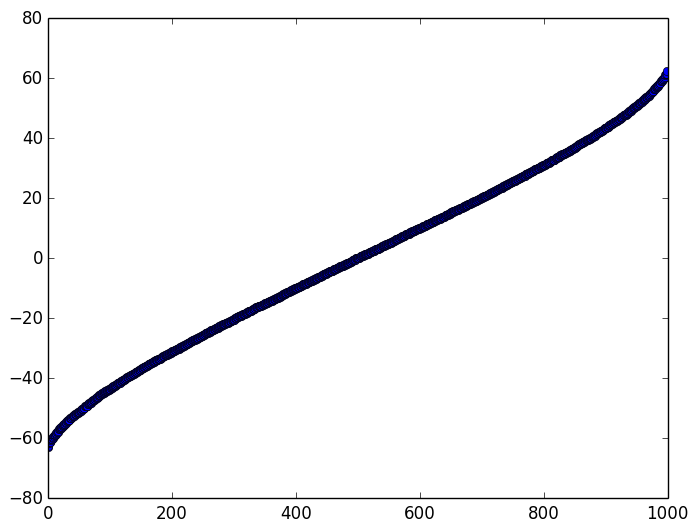

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x10a503250>

In [18]:
plot(lamb, "o-")

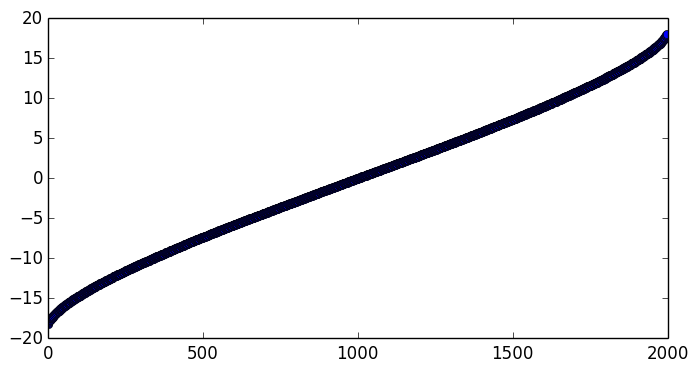

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12739cad0>

In [50]:
PyPlot.figure(figsize=(8,4))
plot(lamb, "o-")

In [22]:
differences = diff(lamb);

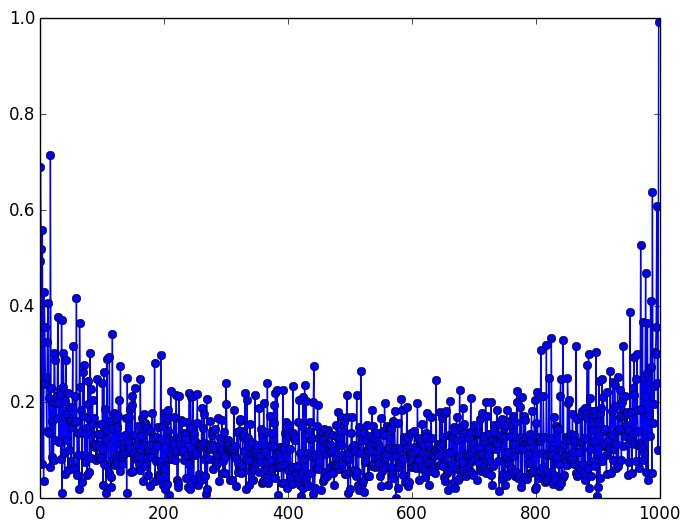

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1039fe650>

In [23]:
plot(differences, "o-")

In [53]:
h = hist(d, 100)

(0.0:0.002:0.14400000000000002,[23,67,129,145,186,148,169,163,133,136  …  0,0,0,0,0,0,0,0,0,1])

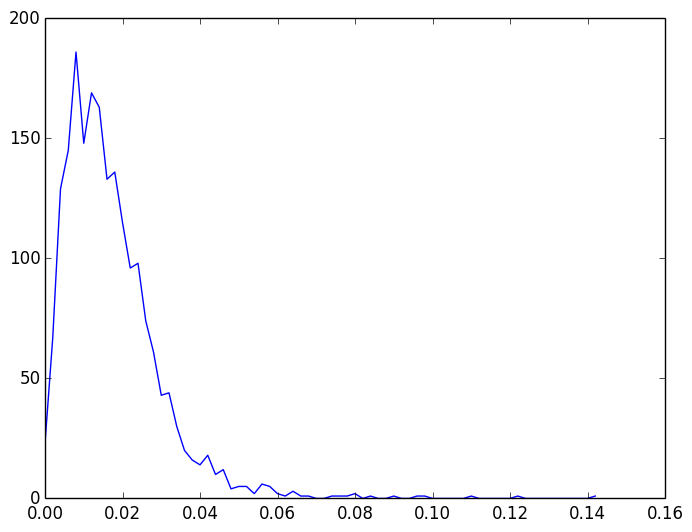

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x127a18350>

In [59]:
plot(collect(h[1][1:end-1]), h[2])

requires vs include vs using vs import


In [70]:
g.particles

10-element Array{Particle,1}:
 Particle(Vector2D(1.1970706607995785,0.9626230979634414),Vector2D(0.860883456513649,0.6912433760368852))    
 Particle(Vector2D(1.053173102651149,0.1511931905677396),Vector2D(0.8340780458653039,0.25711513963745936))   
 Particle(Vector2D(0.23418507182780868,0.1636419234893668),Vector2D(0.5955322025693717,0.24991956880512323)) 
 Particle(Vector2D(0.42255575858509486,0.5273931990785453),Vector2D(0.2006799940853723,0.6328159954800312))  
 Particle(Vector2D(0.3068915889399675,0.13605825532312857),Vector2D(0.43637626808391783,0.18840541521552945))
 Particle(Vector2D(1.261065364493417,0.7019570824715238),Vector2D(0.8829407354236436,0.8559843409264631))    
 Particle(Vector2D(0.19304010783643638,0.6135945878339716),Vector2D(0.5699319437166632,0.633292636020014))   
 Particle(Vector2D(0.6975851395549426,0.35822475426018596),Vector2D(0.9632833403270651,0.6328280131492559))  
 Particle(Vector2D(1.1112601539035263,0.5851179879294491),Vector2D(0.9151617509797421,0.66

In [71]:
for particle in g.particles
    move(particle, 1)
end

g.particles

10-element Array{Particle,1}:
 Particle(Vector2D(2.057954117313227,1.6538664740003266),Vector2D(0.860883456513649,0.6912433760368852))   
 Particle(Vector2D(1.887251148516453,0.40830833020519897),Vector2D(0.8340780458653039,0.25711513963745936))
 Particle(Vector2D(0.8297172743971803,0.41356149229449),Vector2D(0.5955322025693717,0.24991956880512323))  
 Particle(Vector2D(0.6232357526704672,1.1602091945585764),Vector2D(0.2006799940853723,0.6328159954800312)) 
 Particle(Vector2D(0.7432678570238853,0.324463670538658),Vector2D(0.43637626808391783,0.18840541521552945))
 Particle(Vector2D(2.1440060999170605,1.557941423397987),Vector2D(0.8829407354236436,0.8559843409264631))  
 Particle(Vector2D(0.7629720515530996,1.2468872238539856),Vector2D(0.5699319437166632,0.633292636020014))  
 Particle(Vector2D(1.6608684798820077,0.9910527674094418),Vector2D(0.9632833403270651,0.6328280131492559)) 
 Particle(Vector2D(2.0264219048832683,1.2494594506451402),Vector2D(0.9151617509797421,0.664341462715691)) 